<a href="https://colab.research.google.com/github/midhunas00/Maternal-health-risk/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORT THE DATASET

In [ ]:
dataset=pd.read_excel('/content/Maternal Health Risk Data Set.xlsx')

#IMPORTING LIBRARIES

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

#DATA PREPROCESSING

In [ ]:
dataset.shape

(1014, 7)

In [ ]:
dataset.dtypes

,0
ï»¿Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,object


In [ ]:
dataset.columns

Index(['ï»¿Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ï»¿Age       1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
dataset.isnull().sum()

,0
ï»¿Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
dataset.describe()

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [ ]:
dataset.head()

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
dataset.tail()

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
dataset['RiskLevel'].values

array(['high risk', 'high risk', 'high risk', ..., 'high risk',
       'high risk', 'mid risk'], dtype=object)

In [ ]:
dataset['RiskLevel'].value_counts()

,count
RiskLevel,
low risk,406
mid risk,336
high risk,272


In [ ]:
dataset=dataset.fillna('')

In [ ]:
dataset.isnull().sum()

,0
ï»¿Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['RiskLevel'], dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in dataset.columns:
 if dataset[col].dtype=='object':
    dataset[col]=le.fit_transform(dataset[col])

In [ ]:
imputer=SimpleImputer(strategy='mean')
mis_cols=['RiskLevel']
dataset[mis_cols]=imputer.fit_transform

In [ ]:
import seaborn as sns

<ipython-input-27-1600bd35f14a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataset['HeartRate'],kde=True,rug=True)


<Axes: xlabel='HeartRate', ylabel='Density'>

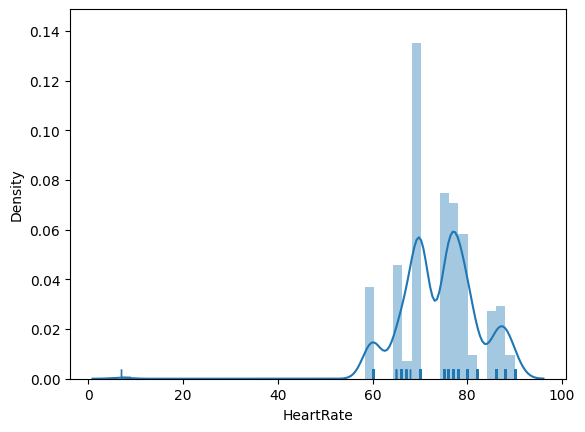

In [ ]:
sns.distplot(a=dataset['HeartRate'],kde=True,rug=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

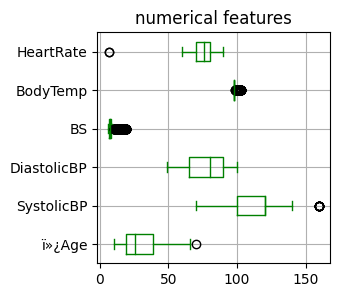

In [ ]:
x=dataset.select_dtypes(include=['int64','float64'])
fig, ax=plt.subplots(figsize=(3,3))
x.boxplot(ax=ax, vert=False,color="green")
plt.title('numerical features')
plt

In [ ]:
dataset=pd.read_excel('/content/Maternal Health Risk Data Set.xlsx')

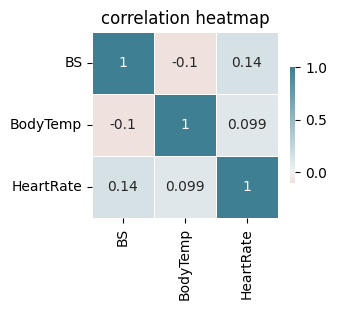

In [ ]:
sublist = dataset[['BS','BodyTemp','HeartRate']]
corr = sublist.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(20,220,n=200),square=True,center=0,linewidths=0.5,cbar_kws={"shrink":0.5}, ax=ax)
plt.title('correlation heatmap')
plt.show()

#EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [ ]:
dataset['RiskLevel'].value_counts()

,count
RiskLevel,
<bound method TransformerMixin.fit_transform of SimpleImputer()>,1014


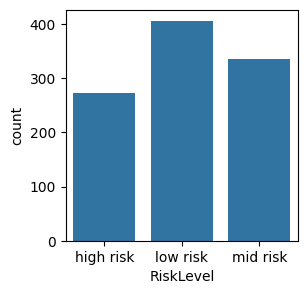

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='RiskLevel',data=dataset)
plt.show()


From the above figure we can infer that the count of high risk maternals are less compared to low risk and mid risk.

Low risk maternals are more


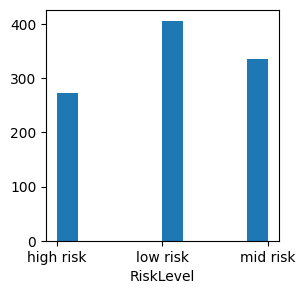

In [ ]:
plt.figure(figsize=(3,3))
plt.hist(x='RiskLevel',data=dataset)
plt.xlabel('RiskLevel')
plt.show()

The bar chart shows the distribution of risk levels.

 The highest number of cases fall into low risk category with the count being around 400.

 The least number of cases fall into high risk category with the count being around 200.

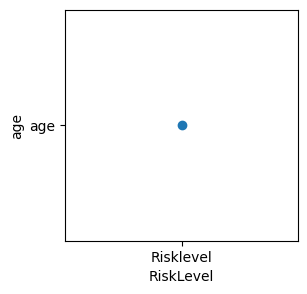

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(x='Risklevel',y='age',data=dataset)
plt.xlabel('RiskLevel')
plt.ylabel('age')
plt.show()

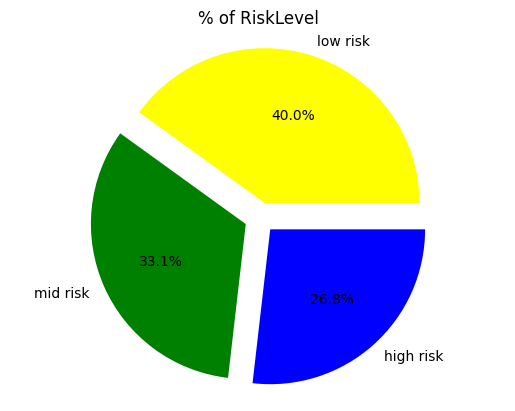

In [ ]:
RiskLevel=dataset['RiskLevel'].value_counts(normalize=True)*100
explode=(0.1,0.1,0.1)
colors=('yellow','green','blue')
plt.pie(RiskLevel,labels=RiskLevel.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('% of RiskLevel')
plt.axis('equal')
plt.show()

The pie chart shows that the percentage distribution of different risk levels.

Low risk category represents the largest portion,with 40.0% of the total cases.

High risk category represents the smallest portion with 26.8% of the total cases.

Mid risk category represents the 33.1% of the total cases.

#FEATURE ENGINEERING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=dataset.iloc[:,:11]
y=dataset['RiskLevel']

In [ ]:
x = x.drop('RiskLevel', axis=1, errors='ignore')

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

In [ ]:
x.head()

,0,1,2,3,4,5
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
dataset.head()

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#MODEL BUILDING

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
logreg = lr(max_iter=1000)

In [ ]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=logreg.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score:{f1}')

Accuracy: 0.6502463054187192
Precision: 0.6593971992902409
Recall: 0.6502463054187192
F1 Score:0.6120297148334531


SUMMARY

Maternal health is a critical aspect of public health,and timely prediction of maternal health risks can
significantly improve outcomes for both mothers and
infants. This project aims to analyse maternal health
data and build a machine learning model that can
accurately predict the risk of maternal health
complications.
The Dataset consists of 1014 records with 7 attributes.

Initially import the required libraries. Also import libraries which is required for evaluating the model and saving the model then upload the dataset. Collect the data structures such as shape, dtypes, info, etc. Then the data is to be preprocessed where the null values are removed . by tokenisation the texts are converted into smaller units.

The next process is to build the model which requires several stages like data preprocessing, training a model, evaluating it's performance, and tuning it to improve its accuracy.

The trained model is saved to the file.This project aims to develop a system that can automatically predict the risk of  maternal health complications which has become increasingly important in the digital age.